In [106]:
class MyLinearRegression:
    def __init__(self, weight=-9, bias=0.25, learning_rate=0.001,
                 iterations=300):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[1,2,3,4,5,6,7,8,9,10], 
        'Scores':[2.1,4.2,6.1,8.4,10.2,12.3,14.2,16.4,18.3,20.4]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,1,2.1
1,2,4.2
2,3,6.1
3,4,8.4
4,5,10.2
5,6,12.3
6,7,14.2
7,8,16.4
8,9,18.3
9,10,20.4


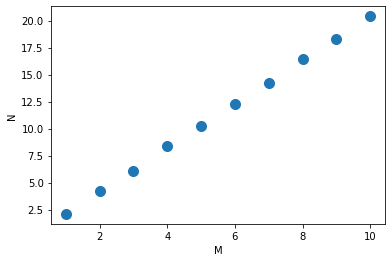

In [108]:
x=[1,2,3,4,5,6,7,8,9,10] 
y=[2.1,4.2,6.1,8.4,10.2,12.3,14.2,16.4,18.3,20.4]
plt.scatter(x,y,s=100)
plt.xlabel('M')
plt.ylabel('N')
plt.show()

In [109]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, : -1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([ 2.1,  4.2,  6.1,  8.4, 10.2, 12.3, 14.2, 16.4, 18.3, 20.4]))

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [-8.37616667]	 Bias: [0.3527]	 Cost: 1522.882727671852
Iteration: 1	 Weight: [-7.78864242]	 Bias: [0.44937216]	 Cost: 1350.777449572811
Iteration: 2	 Weight: [-7.23531349]	 Bias: [0.54036741]	 Cost: 1198.1274866643287
Iteration: 3	 Weight: [-6.71418916]	 Bias: [0.62601626]	 Cost: 1062.7335450387418
Iteration: 4	 Weight: [-6.22339459]	 Bias: [0.70663]	 Cost: 942.6449463325944
Iteration: 5	 Weight: [-5.76116411]	 Bias: [0.78250175]	 Cost: 836.1315233934143
Iteration: 6	 Weight: [-5.32583483]	 Bias: [0.85390762]	 Cost: 741.658692954386
Iteration: 7	 Weight: [-4.91584066]	 Bias: [0.92110759]	 Cost: 657.8653461773077
Iteration: 8	 Weight: [-4.52970669]	 Bias: [0.98434656]	 Cost: 583.5442385225705
Iteration: 9	 Weight: [-4.16604388]	 Bias: [1.04385513]	 Cost: 517.624596413871
Iteration: 10	 Weight: [-3.82354404]	 Bias: [1.09985049]	 Cost: 459.1566901037582
Iteration: 11	 Weight: [-3.50097515]	 Bias: [1.1525372]	 Cost: 407.298150474093
Iteration: 12	 Weight: [-3.19717691

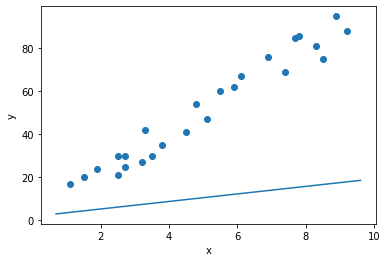

In [111]:
w = regressor.weight
b = regressor.bias
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()